In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math as math
import random as rd
rd.seed(123)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [46]:
filters_pi_prev=pd.read_csv('/home/jsanmar/Downloads/filters_pi_full_filtered.csv')
filters_pi=filters_pi_prev.loc[filters_pi_prev["STORE_NUMBER"] != 1020]
print(filters_pi_prev.shape)
print(filters_pi.shape)
print(filters_pi.SKU_NUMBER.nunique())

(16228766, 36)
(16228180, 36)
4304


In [3]:
filters_pi

,SKU_NUMBER,STORE_NUMBER,APPLICATION_COUNT,ESTABLISHMENTS,SKU_EXISTENCE_PY,SKU_STORE_PDQ_PY,TOTAL_VIO_PY,UNADJUSTED_TOTAL_VIO_PY,SS_SALES_PY,AVG_CLUSTER_UNIT_SALES_PY,...,ppy_gross_sales,py_sales_cost,ppy_sales_cost,LOOKUP_CNT_PY,WEIGHTED_LOOKUP_CNT_PY,py_qty_sold_transfer,py_qty_sold_on_hand,ppy_qty_sold_transfer,ppy_qty_sold_on_hand,fy_ts_forecast
0,5792231,2127,306,391.12,11,11,40.151981,3380.0,0.0,1.07,...,26.96,7.05,7.33,0.0,0.0,0.0,3.0,0.0,4.0,4629.0
1,10162622,4810,13,495.39,11,11,1.001354,230.0,0.0,0.00,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,52.0
2,5792231,4165,306,397.98,11,11,40.958593,2498.0,0.0,1.45,...,5.95,0.00,1.68,0.0,0.0,0.0,0.0,0.0,1.0,4629.0
3,10162622,1039,13,186.72,11,11,0.546644,57.0,0.0,0.00,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,52.0
4,5792231,4500,306,414.78,11,11,46.369579,6725.0,0.0,1.31,...,13.98,9.40,3.36,0.0,0.0,0.0,4.0,0.0,2.0,4629.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16228761,10972414,6967,21,194.58,11,11,0.428148,24.0,0.0,0.00,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,11.0
16228762,10972414,7471,21,130.10,11,11,0.021816,15.0,0.0,0.00,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,11.0
16228763,10972414,7775,21,672.87,11,11,1.269393,32.0,0.0,0.00,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,11.0
16228764,10972414,8409,21,450.59,11,11,0.162839,19.0,0.0,0.00,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,11.0


In [7]:
# EVALUATING AN EXAMPLE
filters_pi_5792231=filters_pi.loc[filters_pi["SKU_NUMBER"] == 5792231, ["QTY_SOLD_PY"]]
filters_pi_5792231.describe()

,QTY_SOLD_PY
count,3901.000000
mean,1.188926
std,1.382098
min,-1.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,22.000000


In [10]:
# EVALUATING A 2ND EXAMPLE
filters_pi_10972414=filters_pi.loc[filters_pi["SKU_NUMBER"] == 10972414, ["QTY_SOLD_PY"]]
filters_pi_10972414.describe()

# SKUS SAles are present in different number of stores per each one

,QTY_SOLD_PY
count,2901.000000
mean,0.000689
std,0.037133
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2.000000


/apps/cent7/jupyterhub/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


array([[<AxesSubplot:title={'center':'QTY_SOLD_PY'}>]], dtype=object)

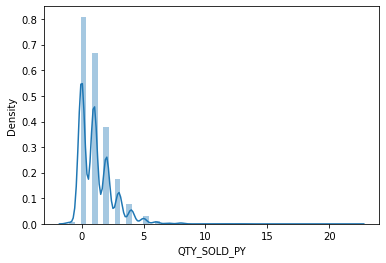

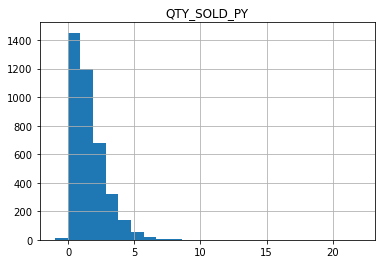

In [11]:
sns.distplot(filters_pi_5792231['QTY_SOLD_PY'])
filters_pi_5792231.hist(bins=24)

/apps/cent7/jupyterhub/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


array([[<AxesSubplot:title={'center':'QTY_SOLD_PY'}>]], dtype=object)

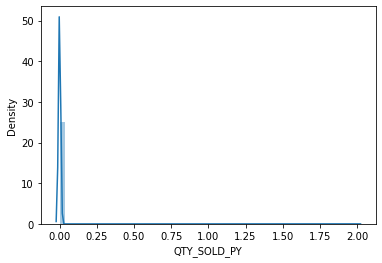

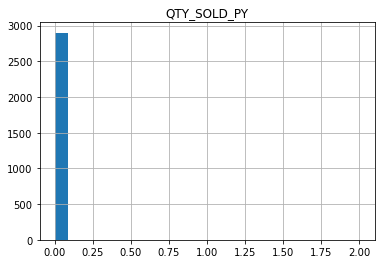

In [12]:
sns.distplot(filters_pi_10972414['QTY_SOLD_PY'])
filters_pi_10972414.hist(bins=24)

In [47]:
stats2 = filters_pi.groupby(['SKU_NUMBER'])['QTY_SOLD_PY'].agg(['sum', 'mean', 'max'])
print(stats2)
print(type(stats2))
stats2_0=stats2.loc[stats2["sum"] == 0, ["sum"]]
list_skus_0 = stats2_0.index.unique().tolist()
n_final_0 = len(list_skus_0)
print(n_final_0)

               sum      mean   max
SKU_NUMBER                        
3110024       -2.0 -0.000839   0.0
3231054     5542.0  1.420661  27.0
3231062      590.0  0.151243   4.0
3231070     3234.0  0.829018  34.0
3231089      180.0  0.046142   3.0
...            ...       ...   ...
26983429      -1.0 -0.000481   0.0
26983438       0.0  0.000000   0.0
26983458       0.0  0.000000   0.0
99991111       1.0  0.000353   1.0
99995830     814.0  0.208664  26.0

[4304 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
422


In [16]:
stats2.describe()

,sum,mean,max
count,4304.000000,4304.000000,4304.000000
mean,1031.016729,0.264469,12.118727
std,3955.832357,1.014139,94.742552
min,-34.000000,-0.008716,0.000000
25%,4.000000,0.001025,1.000000
50%,25.000000,0.006409,2.000000
75%,332.750000,0.085875,5.000000
max,96168.000000,24.652140,4020.000000


In [54]:
stats2_0=stats2.loc[((stats2["sum"] <= 499) & (stats2["max"] <= 49)) , ["sum"]]
list_skus_0 = stats2_0.index.unique().tolist()
n_final_0 = len(list_skus_0)
print(n_final_0)

3364


In [53]:
stats2_0=stats2.loc[(stats2["sum"] <= 499) , ["sum"]]
list_skus_2 = stats2_0.index.unique().tolist()
n_final_2 = len(list_skus_2)
print(n_final_2)

3372


In [55]:
x=list(set(list_skus_0) - set(list_skus_2))
print(sorted(x))

[]


In [56]:
x=list(set(list_skus_2) - set(list_skus_0))
print(sorted(x))

[10704591, 10704822, 10857247, 10975482, 11257043, 11582255, 11680318, 11737933]


In [61]:
# EVALUATING A "missing" EXAMPLE
filters_pi_10704591=filters_pi.loc[filters_pi["SKU_NUMBER"] == 10704591, ["QTY_SOLD_PY"]]
filters_pi_10704591.describe()

,QTY_SOLD_PY
count,3901.000000
mean,0.051269
std,2.869903
min,-2.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,179.000000


In [63]:
filters_pi.describe().T

,count,mean,std,min,25%,50%,75%,max
SKU_NUMBER,16228180.0,1.234383e+07,4.456429e+06,3.110024e+06,1.070901e+07,1.135866e+07,1.209818e+07,9.999583e+07
STORE_NUMBER,16228180.0,6.472710e+03,2.346340e+03,1.000000e+03,5.259000e+03,6.728000e+03,8.464000e+03,9.982000e+03
APPLICATION_COUNT,16228180.0,1.001620e+02,6.406474e+02,0.000000e+00,0.000000e+00,2.000000e+01,6.600000e+01,3.432100e+04
ESTABLISHMENTS,16228180.0,3.529811e+02,2.564867e+02,0.000000e+00,1.984600e+02,3.054900e+02,4.508100e+02,2.462500e+03
SKU_EXISTENCE_PY,16228180.0,1.011601e+01,2.851413e+00,0.000000e+00,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01
SKU_STORE_PDQ_PY,16228180.0,7.681795e+00,5.002164e+00,0.000000e+00,0.000000e+00,1.100000e+01,1.100000e+01,1.100000e+01
TOTAL_VIO_PY,16228180.0,2.927498e+01,2.320038e+02,0.000000e+00,0.000000e+00,1.860214e+00,1.619653e+01,3.489941e+04
UNADJUSTED_TOTAL_VIO_PY,16228180.0,2.644418e+03,2.161497e+04,0.000000e+00,0.000000e+00,1.990000e+02,1.520000e+03,4.200187e+06
SS_SALES_PY,16228180.0,1.361829e-05,9.090317e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01
AVG_CLUSTER_UNIT_SALES_PY,16228180.0,2.496269e-01,1.191310e+00,-1.170000e+00,0.000000e+00,0.000000e+00,6.000000e-02,1.190000e+02


In [62]:
# USING Tukey’s box plot method for Pesky identification
def tukeys_method(df, variable):

    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x < outer_fence_le or x > outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x < inner_fence_le or x > inner_fence_ue:
            outliers_poss.append(index)
    
    n_prob_outliers=len(outliers_prob)
    n_poss_outliers=len(outliers_poss)
    return n_prob_outliers, n_poss_outliers

In [72]:
# Calculating the number of Pesky SKUs using the Tukey’s box plot, extended to the log-IQ method (highly skewed distribution)
list_skus = filters_pi.SKU_NUMBER.unique().tolist()
#Excluding the SKUs that have less or equal than 24 qty as total sales
final_list=list(set(list_skus) - set(list_skus_0))

n=0
pesky_skus_t=[]
for sku in final_list:
    filters_pi_x=filters_pi.loc[filters_pi["SKU_NUMBER"] == sku, ["SKU_NUMBER", "QTY_SOLD_PY"]]
    filters_pi_x['QTY_SOLD_PY_1'] = filters_pi_x['QTY_SOLD_PY']+1
    log_QTY_SOLD_PY = np.log(filters_pi_x['QTY_SOLD_PY_1'])
    filters_pi_x['LOG_QTY_SOLD_PY_1'] = log_QTY_SOLD_PY
    n_prob_o_x, n_poss_o_x = tukeys_method(filters_pi_x, "LOG_QTY_SOLD_PY_1")
    if n_prob_o_x>0:
        n=n+1
        pesky_skus_t.append(sku)

print(len(list_skus))
print(len(list_skus_0))
print(len(final_list))
print(n)
print(pesky_skus_t[:10])
print(round((n*100/len(final_list)),3), "% are Pesky SKUs excluding SKUs with no relevant sales)")

/apps/cent7/jupyterhub/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/apps/cent7/jupyterhub/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


4304
3364
940
933
[15790080, 15790082, 15790086, 15790089, 22880268, 22880269, 22880270, 22880271, 12054540, 22401041]
99.255 % are Pesky SKUs excluding SKUs with no relevant sales)


In [74]:
# EVALUATING A PESKY SKU EXAMPLE
filters_pi_15790086=filters_pi.loc[filters_pi["SKU_NUMBER"] == 15790086, ["QTY_SOLD_PY"]]
filters_pi_15790086.describe()

,QTY_SOLD_PY
count,3901.000000
mean,0.218149
std,0.449887
min,-1.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3.000000


In [75]:
# EVALUATING ANOTHER NEW PESKY SKU EXAMPLE
filters_pi_22880269=filters_pi.loc[filters_pi["SKU_NUMBER"] == 22880269, ["QTY_SOLD_PY"]]
filters_pi_22880269.describe()

,QTY_SOLD_PY
count,3901.000000
mean,1.755960
std,2.319133
min,-1.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,24.000000


In [77]:
# EVALUATING A NON-PESKY SKU EXAMPLE
non_pesky=list(set(final_list) - set(pesky_skus_t))
print(non_pesky)

[11592899, 12067727, 3231119, 11592881, 15790100, 22880344, 11887580]


In [76]:
filters_pi_15790100=filters_pi.loc[filters_pi["SKU_NUMBER"] == 15790100, ["QTY_SOLD_PY"]]
filters_pi_15790100.describe()

,QTY_SOLD_PY
count,3901.000000
mean,4.817226
std,5.384610
min,0.000000
25%,1.000000
50%,3.000000
75%,7.000000
max,58.000000


/apps/cent7/jupyterhub/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


array([[<AxesSubplot:title={'center':'QTY_SOLD_PY'}>]], dtype=object)

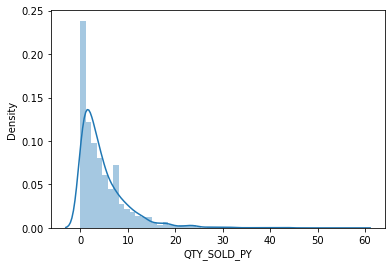

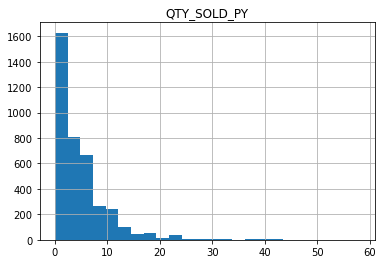

In [78]:
sns.distplot(filters_pi_15790100['QTY_SOLD_PY'])
filters_pi_15790100.hist(bins=24)

In [79]:
# Subsetting the batteries pi data , only using the SKUS inside the pesky_skus_t list

boolean_series = filters_pi.SKU_NUMBER.isin(pesky_skus_t)
filters_pi_model = filters_pi[boolean_series]
print(filters_pi_model.shape)

(3635831, 36)


In [80]:
filters_pi_model.to_csv('/home/jsanmar/Downloads/filters_pi_final.csv', index = False)

In [2]:
filters_pi_model=pd.read_csv('/home/jsanmar/Downloads/filters_pi_final.csv')
print(filters_pi_model.shape)

(3635831, 36)


In [82]:
filters_pi_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3635831 entries, 0 to 3635830
Data columns (total 36 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   SKU_NUMBER                      int64  
 1   STORE_NUMBER                    int64  
 2   APPLICATION_COUNT               int64  
 3   ESTABLISHMENTS                  float64
 4   SKU_EXISTENCE_PY                int64  
 5   SKU_STORE_PDQ_PY                int64  
 6   TOTAL_VIO_PY                    float64
 7   UNADJUSTED_TOTAL_VIO_PY         float64
 8   SS_SALES_PY                     float64
 9   AVG_CLUSTER_UNIT_SALES_PY       float64
 10  AVG_CLUSTER_LOST_SALES_PY       float64
 11  VIO_COMPARED_TO_CLUSTER_PY      float64
 12  ADJUSTED_AVG_CLUSTER_SALES_PY   float64
 13  QTY_SOLD_PPY                    float64
 14  QTY_SOLD_PY                     float64
 15  QTY_SOLD_CY                     float64
 16  AVG_CLUSTER_TOTAL_SALES_PY      float64
 17  SALES_SIGNAL_PY            

In [84]:
filters_pi_model.QTY_SOLD_CY.describe()

count    3.635831e+06
mean     1.147357e+00
std      5.706350e+00
min     -1.700000e+01
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      5.704000e+03
Name: QTY_SOLD_CY, dtype: float64

In [85]:
filters_pi_model.QTY_SOLD_PY.describe()

count    3.635831e+06
mean     1.112694e+00
std      4.651184e+00
min     -2.400000e+01
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      4.020000e+03
Name: QTY_SOLD_PY, dtype: float64

In [25]:
filters_pi_model.describe().T

,count,mean,std,min,25%,50%,75%,max
SKU_NUMBER,713656.0,1.128837e+07,3.098537e+06,3.231712e+06,1.070893e+07,1.138100e+07,1.173794e+07,2.288034e+07
STORE_NUMBER,713656.0,6.485956e+03,2.338550e+03,1.000000e+03,5.280000e+03,6.737000e+03,8.466000e+03,9.982000e+03
APPLICATION_COUNT,713656.0,4.157261e+02,1.754377e+03,0.000000e+00,3.600000e+01,1.180000e+02,3.180000e+02,1.813000e+04
ESTABLISHMENTS,713656.0,3.528477e+02,2.563474e+02,0.000000e+00,1.982800e+02,3.053400e+02,4.506700e+02,2.462500e+03
SKU_EXISTENCE_PY,713656.0,1.063848e+01,1.695009e+00,0.000000e+00,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01
SKU_STORE_PDQ_PY,713656.0,1.057835e+01,1.867452e+00,0.000000e+00,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01
TOTAL_VIO_PY,713656.0,1.824865e+02,8.305546e+02,0.000000e+00,7.694258e+00,5.145053e+01,1.281979e+02,2.950915e+04
UNADJUSTED_TOTAL_VIO_PY,713656.0,1.686253e+04,7.726398e+04,0.000000e+00,8.150000e+02,5.094000e+03,1.194200e+04,4.200187e+06
SS_SALES_PY,713656.0,6.445683e-05,2.942721e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01
AVG_CLUSTER_UNIT_SALES_PY,713656.0,2.373552e+00,4.052211e+00,-1.000000e+00,1.700000e-01,1.290000e+00,3.000000e+00,1.190000e+02


In [31]:
# % missings
a=filters_pi_model.isnull().mean()*100
print(type(filters_pi_model.isnull().mean()*100))
a[a > 0]

# NO MISSINGS !

<class 'pandas.core.series.Series'>


Series([], dtype: float64)

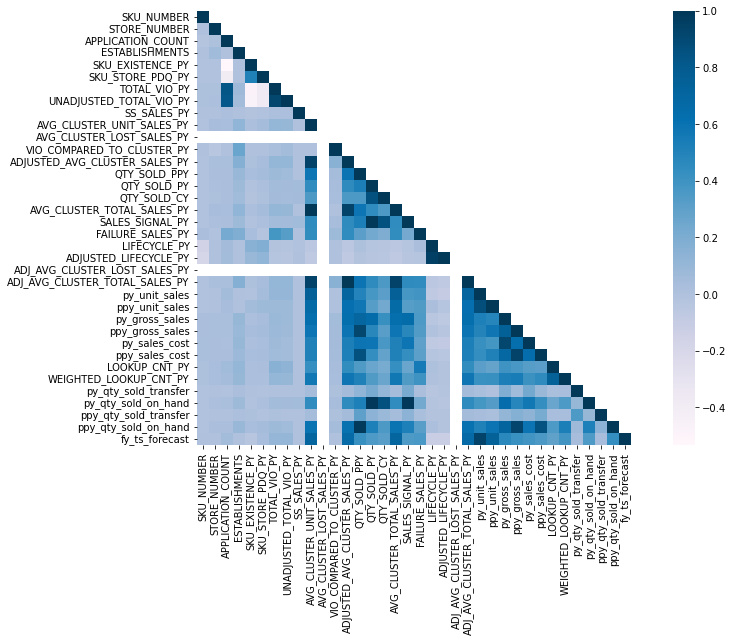

In [87]:
plt.figure(figsize=(15,8))

corr = filters_pi_model.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

for i in range(len(mask)):
    mask[i][i] = False

sns.heatmap(corr, cmap='PuBu', mask=mask, square=True, annot=False)
plt.show()

<AxesSubplot:>

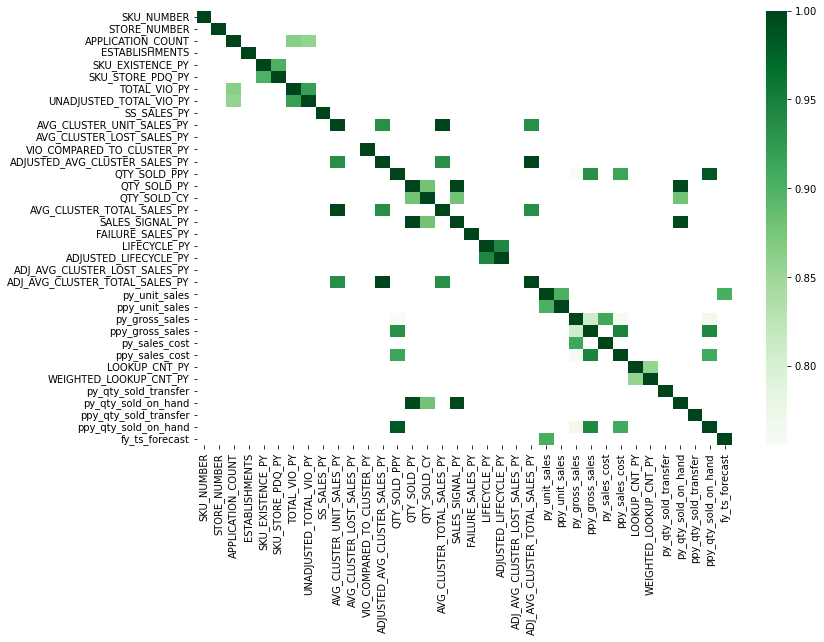

In [20]:
# Plotting correlations above .75

corr = filters_pi_model.corr()

kot = corr[corr>=.75]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

In [99]:
#AVG_CLUSTER_UNIT_SALES_PY
#AVG_CLUSTER_TOTAL_SALES_PY

filters_pi_model[['AVG_CLUSTER_UNIT_SALES_PY','AVG_CLUSTER_TOTAL_SALES_PY']]

,AVG_CLUSTER_UNIT_SALES_PY,AVG_CLUSTER_TOTAL_SALES_PY
0,1.12,1.12
1,0.00,0.00
2,1.13,1.13
3,1.41,1.41
4,0.43,0.43
...,...,...
1042659,15.26,15.26
1042660,15.26,15.26
1042661,19.00,19.00
1042662,1.69,1.69


In [101]:
filters_pi_model[['ADJ_AVG_CLUSTER_TOTAL_SALES_PY','ADJUSTED_AVG_CLUSTER_SALES_PY']]

,ADJ_AVG_CLUSTER_TOTAL_SALES_PY,ADJUSTED_AVG_CLUSTER_SALES_PY
0,0.984925,0.984925
1,0.000000,0.000000
2,1.344129,1.344129
3,0.661467,0.661467
4,0.533914,0.533914
...,...,...
1042659,12.017153,12.017153
1042660,22.262370,22.262370
1042661,28.984394,28.984394
1042662,0.877545,0.877545


In [102]:
filters_pi_model[['SALES_SIGNAL_PY','QTY_SOLD_PY']]

,SALES_SIGNAL_PY,QTY_SOLD_PY
0,1.0,1.0
1,2.0,2.0
2,1.0,1.0
3,0.0,0.0
4,1.0,1.0
...,...,...
1042659,15.0,15.0
1042660,10.0,10.0
1042661,11.0,11.0
1042662,2.0,2.0


In [104]:
filters_pi_model[['SALES_SIGNAL_PY','py_qty_sold_on_hand']]

,SALES_SIGNAL_PY,py_qty_sold_on_hand
0,1.0,1.0
1,2.0,1.0
2,1.0,1.0
3,0.0,0.0
4,1.0,1.0
...,...,...
1042659,15.0,15.0
1042660,10.0,10.0
1042661,11.0,11.0
1042662,2.0,2.0


In [3]:
# DROPPING EQUAL VARIABLES,TOO CORRELATED PREDICTORS, OR EQUAL TO 0
del filters_pi_model['AVG_CLUSTER_UNIT_SALES_PY']
del filters_pi_model['ADJ_AVG_CLUSTER_TOTAL_SALES_PY']
del filters_pi_model['SALES_SIGNAL_PY']
del filters_pi_model['py_qty_sold_on_hand']
del filters_pi_model['ppy_qty_sold_on_hand']
del filters_pi_model['ADJUSTED_LIFECYCLE_PY']
del filters_pi_model['ADJUSTED_AVG_CLUSTER_SALES_PY']
del filters_pi_model['ppy_gross_sales']
del filters_pi_model['ppy_sales_cost']
del filters_pi_model['py_sales_cost']
del filters_pi_model['SKU_STORE_PDQ_PY']
del filters_pi_model['UNADJUSTED_TOTAL_VIO_PY']
del filters_pi_model['AVG_CLUSTER_LOST_SALES_PY']
del filters_pi_model['ADJ_AVG_CLUSTER_LOST_SALES_PY']

<AxesSubplot:>

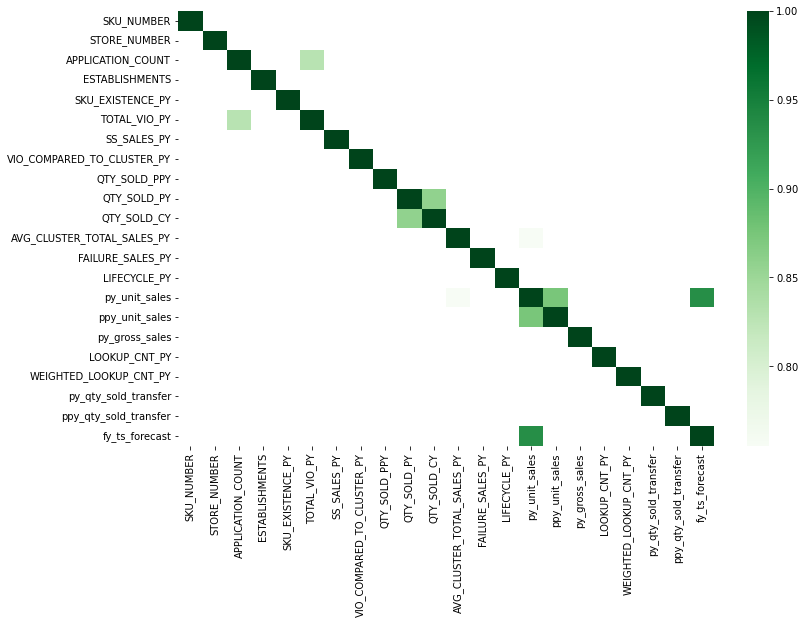

In [89]:
# Plotting AGAIN correlations above .75

corr = filters_pi_model.corr()

kot = corr[corr>=.75]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

In [4]:
filters_pi_model.QTY_SOLD_PY.describe()

count    3.635831e+06
mean     1.112694e+00
std      4.651184e+00
min     -2.400000e+01
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      4.020000e+03
Name: QTY_SOLD_PY, dtype: float64

In [4]:
# Creating categorical variable for qty sold py  < 3

filters_pi_model['High_Sale'] = 1
filters_pi_model.loc[(filters_pi_model['QTY_SOLD_PY'] < 3), 'High_Sale'] = 0

In [5]:
filters_pi_model.High_Sale.describe()

count    3.635831e+06
mean     1.211209e-01
std      3.262677e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: High_Sale, dtype: float64

In [6]:
filters_pi_Normal_Sale=filters_pi_model.loc[filters_pi_model["High_Sale"] == 0, ["QTY_SOLD_PY"]]
filters_pi_High_Sale=filters_pi_model.loc[filters_pi_model["High_Sale"] == 1, ["QTY_SOLD_PY"]]

In [7]:
filters_pi_Normal_Sale.describe()

,QTY_SOLD_PY
count,3.195456e+06
mean,3.970100e-01
std,6.588895e-01
min,-2.400000e+01
25%,0.000000e+00
50%,0.000000e+00
75%,1.000000e+00
max,2.000000e+00


In [8]:
filters_pi_High_Sale.describe()

,QTY_SOLD_PY
count,440375.000000
mean,6.305848
std,12.032272
min,3.000000
25%,3.000000
50%,4.000000
75%,7.000000
max,4020.000000


/apps/cent7/jupyterhub/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='QTY_SOLD_PY', ylabel='Density'>

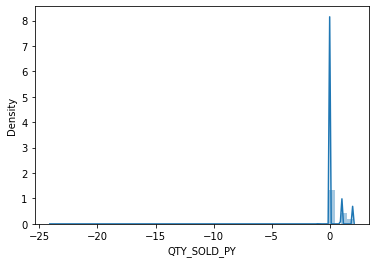

In [109]:
sns.distplot(filters_pi_Normal_Sale['QTY_SOLD_PY'])

<AxesSubplot:>

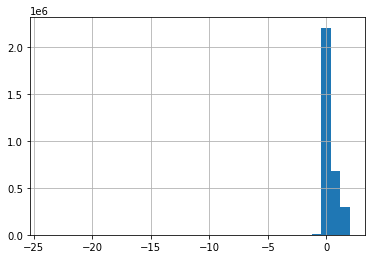

In [110]:
filters_pi_Normal_Sale.QTY_SOLD_PY.hist(bins=32)

/apps/cent7/jupyterhub/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='QTY_SOLD_PY', ylabel='Density'>

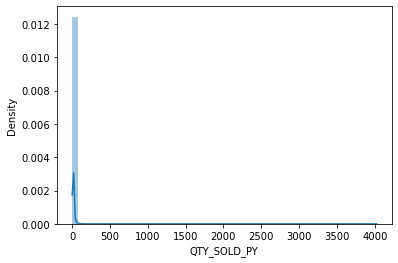

In [111]:
sns.distplot(filters_pi_High_Sale['QTY_SOLD_PY'])

<AxesSubplot:>

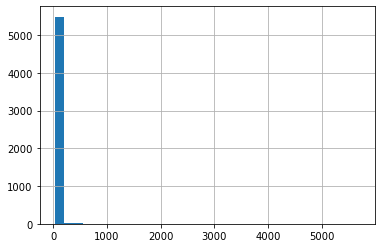

In [87]:
filters_pi_High_Sale.QTY_SOLD_PY.hist(bins=32)

In [112]:
filters_pi_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3635831 entries, 0 to 3635830
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SKU_NUMBER                  int64  
 1   STORE_NUMBER                int64  
 2   APPLICATION_COUNT           int64  
 3   ESTABLISHMENTS              float64
 4   SKU_EXISTENCE_PY            int64  
 5   TOTAL_VIO_PY                float64
 6   SS_SALES_PY                 float64
 7   VIO_COMPARED_TO_CLUSTER_PY  float64
 8   QTY_SOLD_PPY                float64
 9   QTY_SOLD_PY                 float64
 10  QTY_SOLD_CY                 float64
 11  AVG_CLUSTER_TOTAL_SALES_PY  float64
 12  FAILURE_SALES_PY            float64
 13  LIFECYCLE_PY                float64
 14  py_unit_sales               float64
 15  ppy_unit_sales              float64
 16  py_gross_sales              float64
 17  LOOKUP_CNT_PY               float64
 18  WEIGHTED_LOOKUP_CNT_PY      float64
 19  py_qty_sold_transfer 

In [7]:
filters_pi_model.describe().T

,count,mean,std,min,25%,50%,75%,max
SKU_NUMBER,3635831.0,1.163044e+07,4.509438e+06,3.231054e+06,1.070484e+07,1.135561e+07,1.160152e+07,9.999583e+07
STORE_NUMBER,3635831.0,6.489637e+03,2.340516e+03,1.000000e+03,5.280000e+03,6.741000e+03,8.472000e+03,9.982000e+03
APPLICATION_COUNT,3635831.0,2.304042e+02,1.276532e+03,0.000000e+00,2.700000e+01,6.500000e+01,1.570000e+02,3.432100e+04
ESTABLISHMENTS,3635831.0,3.529892e+02,2.565094e+02,0.000000e+00,1.984600e+02,3.054900e+02,4.508100e+02,2.462500e+03
SKU_EXISTENCE_PY,3635831.0,1.092460e+01,6.822077e-01,0.000000e+00,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01
TOTAL_VIO_PY,3635831.0,8.097114e+01,4.746159e+02,0.000000e+00,6.356732e+00,2.163173e+01,6.364555e+01,3.489941e+04
SS_SALES_PY,3635831.0,1.457714e-05,1.323633e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01
VIO_COMPARED_TO_CLUSTER_PY,3635831.0,1.000138e+00,3.344536e-01,1.401244e-01,7.836549e-01,9.870451e-01,1.148257e+00,5.221004e+00
QTY_SOLD_PPY,3635831.0,1.072878e+00,3.498997e+00,-1.700000e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.261000e+03
QTY_SOLD_PY,3635831.0,1.112694e+00,4.651184e+00,-2.400000e+01,0.000000e+00,0.000000e+00,1.000000e+00,4.020000e+03


In [6]:
# Finals variables

del filters_pi_model['STORE_NUMBER']
del filters_pi_model['SKU_NUMBER']

print(filters_pi_model.shape)

(3635831, 21)


In [9]:
filters_pi_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3635831 entries, 0 to 3635830
Data columns (total 21 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   APPLICATION_COUNT           int64  
 1   ESTABLISHMENTS              float64
 2   SKU_EXISTENCE_PY            int64  
 3   TOTAL_VIO_PY                float64
 4   SS_SALES_PY                 float64
 5   VIO_COMPARED_TO_CLUSTER_PY  float64
 6   QTY_SOLD_PPY                float64
 7   QTY_SOLD_PY                 float64
 8   QTY_SOLD_CY                 float64
 9   AVG_CLUSTER_TOTAL_SALES_PY  float64
 10  FAILURE_SALES_PY            float64
 11  LIFECYCLE_PY                float64
 12  py_unit_sales               float64
 13  ppy_unit_sales              float64
 14  py_gross_sales              float64
 15  LOOKUP_CNT_PY               float64
 16  WEIGHTED_LOOKUP_CNT_PY      float64
 17  py_qty_sold_transfer        float64
 18  ppy_qty_sold_transfer       float64
 19  fy_ts_forecast       

In [7]:
# Finals variables

filters_pi_model['Target'] = filters_pi_model['QTY_SOLD_CY']

del filters_pi_model['QTY_SOLD_CY']

print(filters_pi_model.shape)

(3635831, 21)


In [8]:
filters_pi_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3635831 entries, 0 to 3635830
Data columns (total 21 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   APPLICATION_COUNT           int64  
 1   ESTABLISHMENTS              float64
 2   SKU_EXISTENCE_PY            int64  
 3   TOTAL_VIO_PY                float64
 4   SS_SALES_PY                 float64
 5   VIO_COMPARED_TO_CLUSTER_PY  float64
 6   QTY_SOLD_PPY                float64
 7   QTY_SOLD_PY                 float64
 8   AVG_CLUSTER_TOTAL_SALES_PY  float64
 9   FAILURE_SALES_PY            float64
 10  LIFECYCLE_PY                float64
 11  py_unit_sales               float64
 12  ppy_unit_sales              float64
 13  py_gross_sales              float64
 14  LOOKUP_CNT_PY               float64
 15  WEIGHTED_LOOKUP_CNT_PY      float64
 16  py_qty_sold_transfer        float64
 17  ppy_qty_sold_transfer       float64
 18  fy_ts_forecast              float64
 19  High_Sale            

In [11]:
# Splitting the data into training and test dataset
X = filters_pi_model.drop('Target',axis=1).values
y = filters_pi_model.Target.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=123)

In [12]:
# Using sklearn StandardScaler for Predictors

scaler = StandardScaler()
X_train_lasso_p = scaler.fit_transform(X_train[:,:-1])
X_last_columns = X_train[:, -1:]
X_train_sc = np.concatenate((X_train_lasso_p, X_last_columns), axis=1)

X_val_lasso_p = scaler.transform(X_val[:,:-1])
X_last_columns = X_val[:, -1:]
X_val_sc = np.concatenate((X_val_lasso_p, X_last_columns), axis=1)

X_test_lasso_p = scaler.transform(X_test[:,:-1])
X_last_columns = X_test[:, -1:]
X_test_sc = np.concatenate((X_test_lasso_p, X_last_columns), axis=1)

In [15]:
print(X_train_sc.shape)
print(X_val_sc.shape)
print(X_test_sc.shape)
print("High Sales of X_train : ", np.sum(X_train_sc[:,-1:]))
print("High Sales of X_test : ", np.sum(X_val_sc[:,-1:]))
print("High Sales of X_val : ", np.sum(X_test[:,-1:]))

(2181498, 20)
(727166, 20)
(727167, 20)
High Sales of X_train :  263964.0
High Sales of X_test :  88228.0
High Sales of X_val :  88183.0


In [59]:
# DATA BALANCING
#from imblearn.datasets import make_imbalance
#
#sampling_strategy = {0: 263964, 1: 263964}
#X_train_sc, dfX_2_B = make_imbalance(X_train_sc_p, dfX_2, sampling_strategy=sampling_strategy)

In [61]:
# Balanced Data Set
#print(X_train_sc.shape)
#print(X_val_sc.shape)
#print(X_test_sc.shape)
#print("High Sales of X_train : ", np.sum(X_train_sc[:,-1:]))
#print("High Sales of X_test : ", np.sum(X_val_sc[:,-1:]))
#print("High Sales of X_val : ", np.sum(X_test[:,-1:]))

(527928, 20)
(727166, 20)
(727167, 20)
High Sales of X_train :  263964.0
High Sales of X_test :  88228.0
High Sales of X_val :  88183.0


# LASSO

In [16]:
# Lasso Model

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from math import sqrt

reg = Lasso(alpha=1)
reg.fit(X_train_sc, y_train)

# Training data
pred_train = reg.predict(X_train_sc)
mse_train = mean_squared_error(y_train, pred_train)
rmse_t = sqrt(mse_train)
print('RMSE Training set: %f' % rmse_t)

# Validation data
pred = reg.predict(X_val_sc)
mse_val = mean_squared_error(y_val, pred)
rmse_val = sqrt(mse_val)
print('RMSE Validation set: %f' % rmse_val)

RMSE Training set: 3.180961
RMSE Validation set: 2.962893


In [17]:
# Test data
pred = reg.predict(X_test_sc)
mse_test =mean_squared_error(y_test, pred)
rmse_test= sqrt(mse_test)
print('RMSE Test set: %f' % rmse_test)

RMSE Test set: 2.430026


In [18]:
# Best Lasso
from sklearn.linear_model import LassoCV
# Lasso with 10 fold cross-validation
model = LassoCV(cv=10, random_state=0, max_iter=10000)
model.fit(X_train_sc, y_train)

LassoCV(cv=10, max_iter=10000, random_state=0)

In [19]:
print(model.alpha_)

0.004995933754378351


In [20]:
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train_sc, y_train)

# Training data
pred_train = lasso_best.predict(X_train_sc)
mse_train = mean_squared_error(y_train, pred_train)
rmse_t = sqrt(mse_train)
print('RMSE Training set: %f' % rmse_t)

# Validation data
pred = lasso_best.predict(X_val_sc)
mse_val =mean_squared_error(y_val, pred)
rmse_val = sqrt(mse_val)
print('RMSE Validation set: %f' % rmse_val)

RMSE Training set: 2.521823
RMSE Validation set: 3.650147


In [21]:
lasso_best.coef_

array([-0.02678094,  0.04213959,  0.        , -0.        , -0.02816408,
        0.02616482, -0.37769595,  6.48284277,  0.12670212,  0.12945711,
       -0.04996477, -0.1877282 , -0.2074703 , -1.87049875,  0.08121235,
        0.10713091, -0.4358699 , -0.05635564,  0.7467127 , -1.11882104])

In [22]:
# Test data
pred = lasso_best.predict(X_test_sc)
mse_test =mean_squared_error(y_test, pred)
rmse_test= sqrt(mse_test)
print('RMSE Test set: %f' % rmse_test)

RMSE Test set: 2.326624


# MULTIPLE LINEAR REGRESSION

In [23]:
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train_sc, y_train)

LinearRegression()

In [24]:
# Training data
pred_train = LR.predict(X_train_sc)
mse_train = mean_squared_error(y_train, pred_train)
rmse_t = sqrt(mse_train)
print('RMSE Training set: %f' % rmse_t)

# Validation data
pred = LR.predict(X_val_sc)
mse_val = mean_squared_error(y_val, pred)
rmse_val = sqrt(mse_val)
print('RMSE Validation set: %f' % rmse_val)

# Test data
pred = LR.predict(X_test_sc)
mse_test =mean_squared_error(y_test, pred)
rmse_test= sqrt(mse_test)
print('RMSE Test set: %f' % rmse_test)

RMSE Training set: 2.521467
RMSE Validation set: 3.664874
RMSE Test set: 2.329935


# POLYNOMIAL REGRESSION

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                    ('linear', LinearRegression(fit_intercept=False))])

model.fit(X_train_sc, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('linear', LinearRegression(fit_intercept=False))])

In [26]:
# Training data
pred_train = model.predict(X_train_sc)
mse_train = mean_squared_error(y_train, pred_train)
rmse_t = sqrt(mse_train)
print('RMSE Training set: %f' % rmse_t)

# Validation data
pred = model.predict(X_val_sc)
mse_val = mean_squared_error(y_val, pred)
rmse_val = sqrt(mse_val)
print('RMSE Validation set: %f' % rmse_val)

# Test data
pred = model.predict(X_test_sc)
mse_test =mean_squared_error(y_test, pred)
rmse_test= sqrt(mse_test)
print('RMSE Test set: %f' % rmse_test)

RMSE Training set: 2.179005
RMSE Validation set: 562944094.395415
RMSE Test set: 51604.068013


In [27]:
model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                    ('linear', LinearRegression(fit_intercept=False))])

model.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('linear', LinearRegression(fit_intercept=False))])

In [28]:
# Training data
pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
rmse_t = sqrt(mse_train)
print('RMSE Training set: %f' % rmse_t)

# Validation data
pred = model.predict(X_val)
mse_val = mean_squared_error(y_val, pred)
rmse_val = sqrt(mse_val)
print('RMSE Validation set: %f' % rmse_val)

# Test data
pred = model.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
rmse_test= sqrt(mse_test)
print('RMSE Test set: %f' % rmse_test)

RMSE Training set: 2.179005
RMSE Validation set: 6.634050
RMSE Test set: 2.252403


In [29]:
model = Pipeline([('poly', PolynomialFeatures(interaction_only=True)),
                    ('linear', LinearRegression(fit_intercept=False))])

model.fit(X_train_sc, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(interaction_only=True)),
                ('linear', LinearRegression(fit_intercept=False))])

In [30]:
# Training data
pred_train = model.predict(X_train_sc)
mse_train = mean_squared_error(y_train, pred_train)
rmse_t = sqrt(mse_train)
print('RMSE Training set: %f' % rmse_t)

# Validation data
pred = model.predict(X_val_sc)
mse_val = mean_squared_error(y_val, pred)
rmse_val = sqrt(mse_val)
print('RMSE Validation set: %f' % rmse_val)

# Test data
pred = model.predict(X_test_sc)
mse_test =mean_squared_error(y_test, pred)
rmse_test= sqrt(mse_test)
print('RMSE Test set: %f' % rmse_test)

RMSE Training set: 2.205440
RMSE Validation set: 64456188995.475082
RMSE Test set: 20098427.190833


In [31]:
model = Pipeline([('poly', PolynomialFeatures(interaction_only=True)),
                    ('linear', LinearRegression(fit_intercept=False))])

model.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(interaction_only=True)),
                ('linear', LinearRegression(fit_intercept=False))])

In [32]:
# Training data
pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
rmse_t = sqrt(mse_train)
print('RMSE Training set: %f' % rmse_t)

# Validation data
pred = model.predict(X_val)
mse_val = mean_squared_error(y_val, pred)
rmse_val = sqrt(mse_val)
print('RMSE Validation set: %f' % rmse_val)

# Test data
pred = model.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
rmse_test= sqrt(mse_test)
print('RMSE Test set: %f' % rmse_test)

RMSE Training set: 2.205439
RMSE Validation set: 5.218525
RMSE Test set: 2.264519


# RANDOM FOREST REGRESSOR

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

RF = RandomForestRegressor(max_depth=3, random_state=0)

RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, random_state=0)

In [35]:
# Training data
pred_train = RF.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
rmse_t = sqrt(mse_train)
print('RMSE Training set: %f' % rmse_t)

# Validation data
pred = RF.predict(X_val)
mse_val = mean_squared_error(y_val, pred)
rmse_val = sqrt(mse_val)
print('RMSE Validation set: %f' % rmse_val)

# Test data
pred = RF.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
rmse_test= sqrt(mse_test)
print('RMSE Test set: %f' % rmse_test)

RMSE Training set: 2.876496
RMSE Validation set: 3.937239
RMSE Test set: 2.596838


In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

RF = RandomForestRegressor(n_estimators=150, max_depth=4, random_state=0)

RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=150, random_state=0)

In [37]:
# Training data
pred_train = RF.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
rmse_t = sqrt(mse_train)
print('RMSE Training set: %f' % rmse_t)

# Validation data
pred = RF.predict(X_val)
mse_val = mean_squared_error(y_val, pred)
rmse_val = sqrt(mse_val)
print('RMSE Validation set: %f' % rmse_val)

# Test data
pred = RF.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
rmse_test= sqrt(mse_test)
print('RMSE Test set: %f' % rmse_test)

RMSE Training set: 2.655817
RMSE Validation set: 3.885979
RMSE Test set: 2.427861


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

RF = RandomForestRegressor(n_estimators=130, max_depth=5, max_features=3, random_state=0)

RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features=3, n_estimators=130,
                      random_state=0)

In [39]:
# Training data
pred_train = RF.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
rmse_t = sqrt(mse_train)
print('RMSE Training set: %f' % rmse_t)

# Validation data
pred = RF.predict(X_val)
mse_val = mean_squared_error(y_val, pred)
rmse_val = sqrt(mse_val)
print('RMSE Validation set: %f' % rmse_val)

# Test data
pred = RF.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
rmse_test= sqrt(mse_test)
print('RMSE Test set: %f' % rmse_test)

RMSE Training set: 3.630107
RMSE Validation set: 3.987754
RMSE Test set: 2.445041


In [40]:
RF = RandomForestRegressor(n_estimators=200, max_depth=4, random_state=0)

RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=200, random_state=0)

In [41]:
# Training data
pred_train = RF.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
rmse_t = sqrt(mse_train)
print('RMSE Training set: %f' % rmse_t)

# Validation data
pred = RF.predict(X_val)
mse_val = mean_squared_error(y_val, pred)
rmse_val = sqrt(mse_val)
print('RMSE Validation set: %f' % rmse_val)

# Test data
pred = RF.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
rmse_test= sqrt(mse_test)
print('RMSE Test set: %f' % rmse_test)

RMSE Training set: 2.619037
RMSE Validation set: 3.932706
RMSE Test set: 2.454730
